# Toy Examples of complex graph measures
This script includes the creation of the following figures:
* Node degree - toy example 
* Graph partitioning - toy example
* Hierarchy index - toy example
* Rich club coefficient - toy example

In [1]:
# IMPORTS
import os
import cv2
import json
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import glob
import scipy.cluster.vq as clusters
import scipy.sparse as sparse
import warnings
import random_graph
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.special import binom as nchoosek
from pandas.plotting import autocorrelation_plot as AC_plot 
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from skimage.filters import gaussian
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from skimage.transform.pyramids import pyramid_expand as expand
from skimage.transform.pyramids import pyramid_reduce as reduce
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
from itertools import combinations

import pickle
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


# Git Paths
DATA_PATH = '/Users/lessmann/Desktop/PaperFigures/'

# load the city map image
white_bg_img = cv2.imread("./ressources/map_white.png")


# Visuals - global variables
fontsize = 20
fontweight = 'bold'
labelfontsize = 30
figurelabels = ['A','B','C','D']


# COLOR
# color defs
green = [0.40,0.80,0.42]
blue = [0.27,0.38,0.99]
yellow = [0.96,0.73,0.23]
darkblue = [0.18, 0.19, 0.69]
lightyellow = [0.9763, 0.9831, 0.0538] 
grey = [0.75,0.75,0.75]
white = [1,1,1]
black = [0,0,0]

# implement parula color map scheme from matlab 
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

plt.rcParams.update({'font.family':'Arial'})

# Node Degree Toy

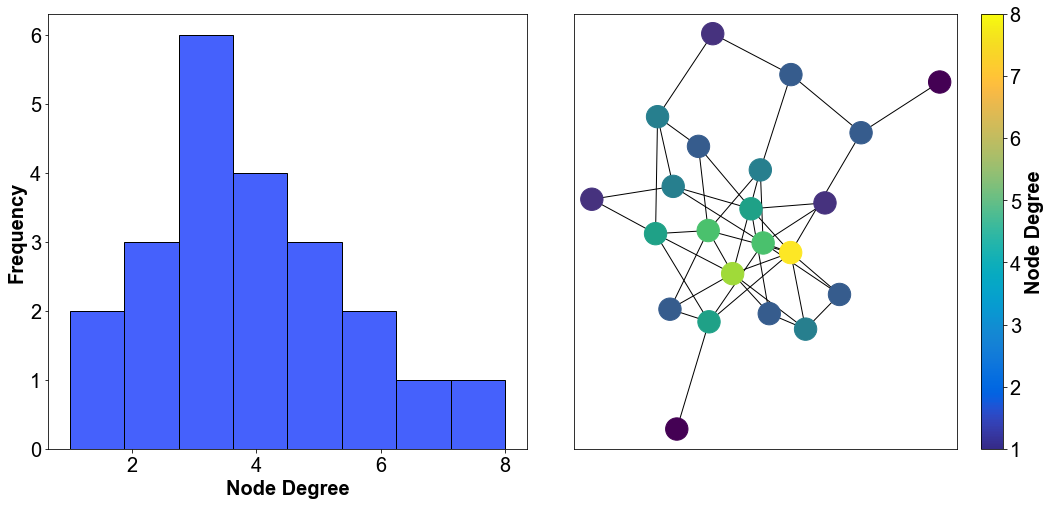

In [39]:
# example degree list to create graph
degree_list = [1,1,2,2,2,3,3,3,3,3,3,4,4,4,4,5,5,5,6,6,7,8]

edges = random_graph.sample_simple_graph(degree_list)

# create graph
G_nd = nx.Graph()
G_nd = nx.from_edgelist(edges)

# get degree dictionary and degree list of the graph (degree list is obsolete, just for consistency)
degree_dict = dict(G_nd.degree)
degree_list = list(degree_dict.values())



# FIGURE
figgy = plt.figure(figsize=(18,8))

gs = gridspec.GridSpec(ncols=2, nrows=1, 
                       width_ratios=[1, 1],
                       wspace=0.1)

# plot degree distribution on the left axis
ax1 = figgy.add_subplot(gs[0])
plt.hist(degree_list, len(np.unique(degree_list)), color=blue, ec='k')
plt.xlabel('Node Degree', fontsize=20, weight='bold')
plt.ylabel('Frequency', fontsize=20, weight='bold')
ax1.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = fontsize)

# plot color-coded graph on the right axis
ax2 = figgy.add_subplot(gs[0:, -1])
nx.draw_networkx(G_nd, node_color=degree_list, node_size=500, font_size=15, with_labels=False)

vmin = np.min(degree_list)
vmax = np.max(degree_list)
sm = plt.cm.ScalarMappable(cmap=parula_map, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Node Degree', size=20, weight='bold')



# SAVING
plt.savefig(DATA_PATH + "Toy_NodeDegree.png",
            dpi=200,
            format="PNG",
            facecolor='white',
            transparent=False, 
            bbox_inches = "tight")

## Basic statistics

In [3]:
mean = np.mean(degree_list)
std = np.std(degree_list)

print('Mean Degree:' 
      + str(round(mean,2)) 
      + ', STD: ' 
      + str(round(std,2))
      + ', one sigma at: ' + str(round(mean+std,2))
      + ', two sigma at: ' + str(round(mean+2*std,2))
     )

Mean Degree:3.82, STD: 1.8, one sigma at: 5.62, two sigma at: 7.42


# Partitioning Toy

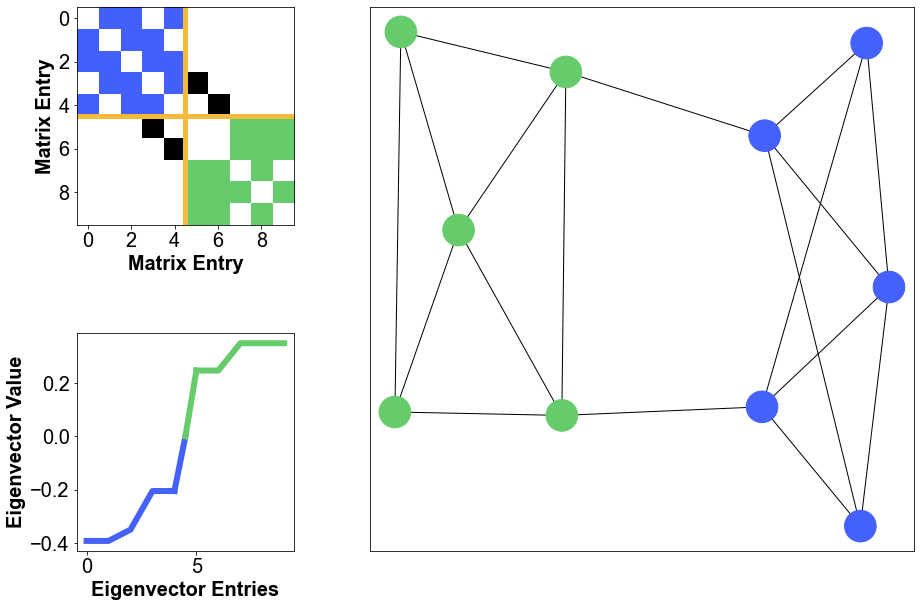

In [2]:
# Example adjacency matrix to create the graph
adj_matrix_cluster = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                               [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                               [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                               [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
                               [0, 1, 1, 1, 0, 0, 1, 0, 0, 0],
                               [0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
                               [0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
                               [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
                               [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
                               [0, 0, 0, 0, 0, 1, 1, 0, 1, 0]])

# create graph
G_cluster = nx.from_numpy_matrix(adj_matrix_cluster)

# get the laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G_cluster)
laplacian_matrix = sparse.csr_matrix.toarray(laplacian_matrix)

# Get the eigenvalues and vectors
Eigenvalue, Eigenvector = np.linalg.eig(laplacian_matrix)
# sort Eigenvalues in ascending order and use index to sort eigenvectors
index_array = np.argsort(Eigenvalue)

# get second smallest Eigenvalue and corresponding eigenvector
Eigenvalue_2 = Eigenvalue[index_array[1]]
Eigenvector_2 = Eigenvector[:,index_array[1]]

# sort the eigenvector and sorting index
vec_arg = np.argsort(Eigenvector_2)
vec_sort = np.sort(Eigenvector_2)

# split the eigenvector into positive and negative component (based on its entries)
eig_pos = vec_sort[vec_sort>=0]
eig_neg = vec_sort[vec_sort<0]


# for the correct colored plotting of the sparsity pattern matrix
colors = []
for i in Eigenvector_2: 
    if i >= 0: 
        colors.append(blue)
    else: 
        colors.append(green)
        
# get a sorted adjacency matrix according to the sorting index of the 2nd smallest eigenvector       
adj = sparse.csr_matrix.toarray(nx.adjacency_matrix(G_cluster, nodelist=vec_arg))

# create a copy of the adjacency matrix for color-coded plotting 
adj_colors = np.empty((adj.shape[0], adj.shape[1], 3))
# iterate through the matrix
for row in range(adj.shape[0]):
    for col in range(adj.shape[1]):
        # if the entry is 0, assign white to the entry
        if adj[row,col] == 0:
            adj_colors[row,col,:] = white
            
        # if the entry is 1 assign blue, green, or black according to the cluster
        # Since this is a constructed example, the cluster size of 5 nodes each is known and used here
        elif adj[row,col] == 1:
            # if the edge connects nodes from the first cluster (known), assign blue
            if row <= 4 and col <=4:
                adj_colors[row,col,:] = blue
            
            # if the edge connects nodes from the second cluster (known), assign green
            elif row > 4 and col > 4:
                adj_colors[row,col,:] = green
            # if the edge connects nodes from the two clusters (known), assign black
            elif ((row > 4) and not (col > 4)) or (not (row > 4) and (col > 4)):
                adj_colors[row,col,:] = black
                
                


# PLOTTING

figgy = plt.figure(figsize=(15,10))

# create grid for different subplots                    
gs = gridspec.GridSpec(ncols=2, nrows=2, 
                       width_ratios=[1, 2.5],
                       height_ratios=[1, 1],
                       wspace=0.2,
                       hspace=0.5)


# plot the color-coded sparsity pattern matrix on the top left axis
ax1 = figgy.add_subplot(gs[0])
node_colors = ListedColormap([white, grey])
plt.imshow(adj_colors)

plt.plot([9.5,-0.5],[4.5,4.5], color=yellow, linewidth=5)
plt.plot([4.5,4.5],[-0.5,9.5], color=yellow, linewidth=5)

# settings
plt.xlabel('Matrix Entry', fontsize=fontsize, weight='bold')
plt.ylabel('Matrix Entry', fontsize=fontsize, weight='bold')
plt.xticks([0,2,4,6,8])
plt.yticks([0,2,4,6,8])
ax1.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = fontsize)

# plot the color-coded second smallest eigenvector on the bottom left axis
ax2 = figgy.add_subplot(gs[0:, -1])
nx.draw_networkx(G_cluster, node_color=colors, node_size=1000, font_size=20, with_labels = False)

# plot the color-coded graph on the right axis
ax3 = figgy.add_subplot(gs[2])
plt.plot(range(len(eig_neg)), eig_neg, linewidth=6, color=blue)
plt.plot(range(len(eig_pos),len(vec_sort)), eig_pos, linewidth=6, color=green)

neg_max = max(eig_neg)
pos_min = min(eig_pos)
# plot a line between them
plt.plot([4,4.5],[neg_max,0], color=blue, linewidth=6)
plt.plot([4.5,5],[0,pos_min], color=green, linewidth=6)

# settings
plt.xlabel('Eigenvector Entries', fontsize=fontsize, weight='bold')
plt.ylabel('Eigenvector Value', fontsize=fontsize, weight='bold')
ax3.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
ax3.tick_params(axis = 'both', which = 'minor', labelsize = fontsize)


# SAVING
plt.savefig(DATA_PATH + "Toy_Partitioning.png",
            dpi=200,
            format="PNG",
            facecolor='white',
            transparent=False, 
            bbox_inches = "tight")

# Hierarchy Toy

Hierarchy Index:2.3960772148459997


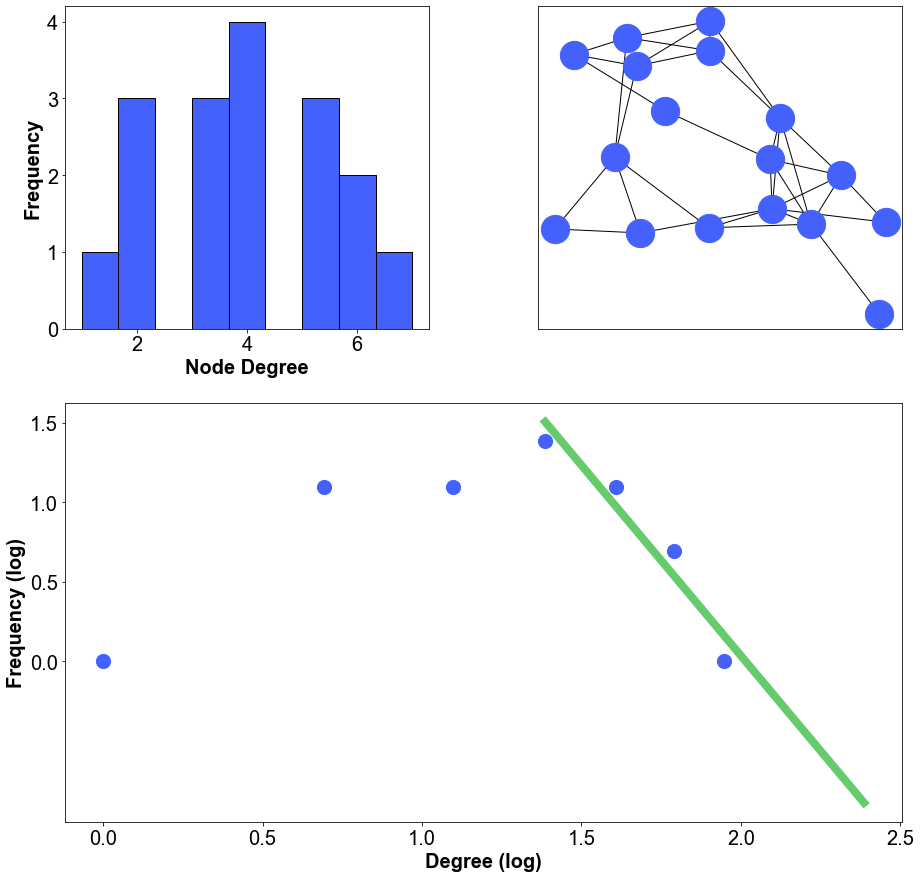

In [18]:
# Example adjacency matrix to create the graph
adj_matrix_hier = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                            [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                            [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
                            [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
                            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0 ,1 ,1 ,1, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0 ,1 ,1 ,1, 0, 1, 0, 0, 0]])

# create the graph
G_hier = nx.from_numpy_matrix(adj_matrix_hier)
 
# get the degree dictionary, list and median degree (as a later threshold)
degree_dict = dict(G_hier.degree)
degree_list = list(degree_dict.values())
median_degree = np.median(degree_list)

# get a list of unique degree values
UniqueDegree = np.unique(degree_list)
UniqueDegreeMed = UniqueDegree[UniqueDegree >= median_degree]

# get the frequency of each degree value (also for the data above the median)
DegreeFrequency = dict()
for degree in UniqueDegree:
    DegreeFrequency[degree] = np.sum(degree_list==degree)
# above the median
DegreeFrequencyMed = np.array(list(DegreeFrequency.values()))[UniqueDegree >= median_degree]

# do a linear fit of the log data of Unique Degree over Frequency
linear_model=np.polyfit(np.log(UniqueDegreeMed),np.log(DegreeFrequencyMed),1)
linear_model_fn=np.poly1d(linear_model)

# get the hierarchy index (the negative slope of the linear fit)
hierarchy_index = -linear_model[0]

# print the value
print('Hierarchy Index:' + str(hierarchy_index))


# PLOTTING

figgy = plt.figure(figsize=(15,15))

gs = gridspec.GridSpec(ncols=2, nrows=2, 
                       width_ratios=[1, 1],
                       height_ratios=[1, 1.3],
                       wspace=0.3)


# plot the node degree distribution the top left axis
figgy.add_subplot(gs[0])

plt.hist(degree_list, bins=9, color=blue, ec='k')
plt.xlabel('Node Degree', fontsize=20, weight='bold')
plt.ylabel('Frequency', fontsize=20, weight='bold')
plt.rc('xtick', labelsize = fontsize)
plt.rc('ytick', labelsize = fontsize)

# plot the example graph on the top right axis
figgy.add_subplot(gs[1])

nx.draw_networkx(G_hier, node_color=blue, node_size=800, font_size=15, with_labels=False)

# plot the scatter plot of Degree value against frequency with the linear fit on the bottom axis
figgy.add_subplot(gs[1, 0:2])

plt.scatter(np.log(UniqueDegree),np.log(list(DegreeFrequency.values())), 200, color=blue)
x_s=np.arange(np.log(median_degree) ,max(np.log(UniqueDegree)+0.5))
plt.plot(x_s, linear_model_fn(x_s),color=green, linewidth=8)

# settings
plt.xlabel('Degree (log)', fontsize=fontsize, weight='bold')
plt.ylabel('Frequency (log)', fontsize=fontsize, weight='bold')
plt.rc('xtick', labelsize=fontsize) 
plt.rc('ytick', labelsize=fontsize)
plt.yticks([0,0.5,1,1.5])


# SAVING

plt.savefig(DATA_PATH + "Toy_Hierarchy.png",
            dpi=200,
            format="PNG",
            facecolor='white',
            transparent=False, 
            bbox_inches = "tight")


## Basic statistics

In [34]:
mean = np.mean(degree_list)
std = np.std(degree_list)

print('Mean Degree:' 
      + str(round(mean,2)) 
      + ', STD: ' 
      + str(round(std,2))
      + ', one sigma at: ' + str(round(mean+std,2))
      + ', two sigma at: ' + str(round(mean+2*std,2))
     )

Mean Degree:3.88, STD: 1.6, one sigma at: 5.49, two sigma at: 7.09


# Rich Club Toy

In [7]:
# Example adjacency matrix to create the graph
adj_matrix_rich = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                            [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                            [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
                            [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                            [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
                            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# create the graph
G_rich = nx.from_numpy_matrix(adj_matrix_rich)
 
# get the degree dictionary and list
degree_dict = dict(G_rich.degree)
degree_list = list(degree_dict.values())

# calculate the rich club coefficient 
RC = nx.rich_club_coefficient(G_rich, normalized=False, seed=1)

# create a random graph for the rich club weighting with the same degree distribution
edges = random_graph.sample_simple_graph(degree_list)
randomG = nx.Graph()
randomG = nx.from_edgelist(edges)

# calculate the ric club for the random graph
RC_random = nx.rich_club_coefficient(randomG, normalized=False, seed=2)

RichClub = np.array(list(RC.values()))/np.array(list(RC_random.values()))

# Save the rich club array
np.savetxt(DATA_PATH+"RichClub.csv", 
           RichClub,
           delimiter =", ", 
           fmt ='% s')

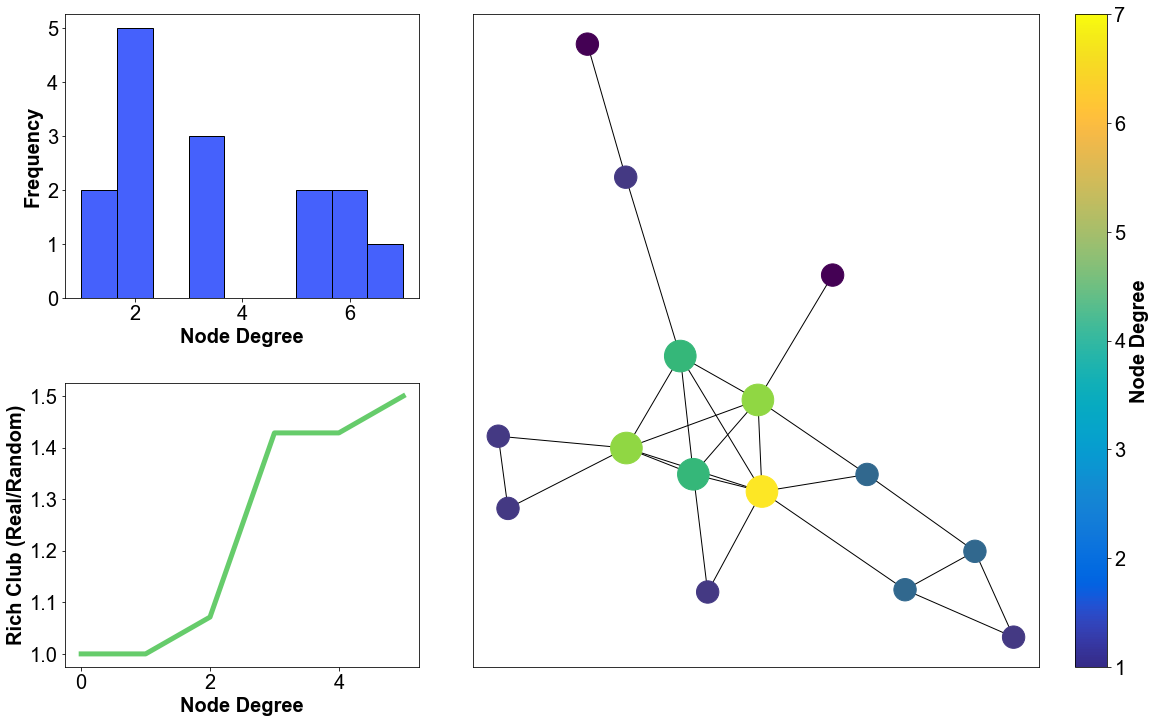

In [14]:
# PLOTTING

# node sizes for plotting 
node_size = [1000, 1000,1000,1000,1000,500,500,500,500,500,500,500,500,500,500]

figgy = plt.figure(figsize=(20,12))

gs = gridspec.GridSpec(ncols=2, nrows=2, 
                       width_ratios=[1, 2],
                       height_ratios=[1, 1],
                       wspace=0.1,
                       hspace=0.3)

# plot the node degree distribution the top left axis
ax1 = figgy.add_subplot(gs[0])
plt.hist(degree_list, color=blue, ec='k', bins=9)
plt.xlabel('Node Degree', fontsize=20, weight='bold')
plt.ylabel('Frequency', fontsize=20, weight='bold')
ax1.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = fontsize)

# plot the color- and size-coded graph on the right axis
ax2 = figgy.add_subplot(gs[0:, -1])
nx.draw_networkx(G_rich, node_color=degree_list, node_size=node_size, font_size=15, with_labels=False)

vmin = np.min(degree_list)
vmax = np.max(degree_list)
sm = plt.cm.ScalarMappable(cmap=parula_map, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Node Degree', size=20, weight='bold')

# plot the rich club array on the bottom left axis
ax3 = figgy.add_subplot(gs[2])
plt.plot(RichClub, color=green, linewidth=5)
plt.xlabel('Node Degree', fontsize=20, weight='bold')
plt.ylabel('Rich Club (Real/Random)', fontsize=20, weight='bold')
ax3.tick_params(axis = 'both', which = 'major', labelsize = fontsize)
ax3.tick_params(axis = 'both', which = 'minor', labelsize = fontsize)


# SAVING
plt.savefig(DATA_PATH + "Toy_RichClub.png",
            dpi=200,
            format="PNG",
            facecolor='white',
            transparent=False, 
            bbox_inches = "tight")